# Hotel Data
## Aaron Kohn 
### 5/30/2021

In [1]:
import pandas

import matplotlib.pyplot as plt
import numpy as np
import probscale as ps
import scipy.stats as stat
import statsmodels.api as sm
import statsmodels.sandbox.regression.predstd as sms

In [2]:
# Read data
dfh1 = pandas.read_csv("C:/Users/aarme/OneDrive/Desktop/530/dsc530/Final project 530/H1.csv")
dfh2 = pandas.read_csv("C:/Users/aarme/OneDrive/Desktop/530/dsc530/Final project 530/H2.csv")

In [3]:
# Add label to identify data
dfh1['hotel'] = 'h1'
dfh2['hotel'] = 'h2'

In [4]:
# Merge data add columns for totals.
dfs = [dfh1, dfh2]
dfh3 = pandas.concat(dfs, ignore_index= True)
dfh3["StaysTotalNights"] = dfh3.StaysInWeekendNights + dfh3.StaysInWeekNights
dfh3["PreviousBookings"] = dfh3.PreviousCancellations + dfh3.PreviousBookingsNotCanceled
dfh3['WeekCount']= dfh3.groupby(['ArrivalDateWeekNumber'])['LeadTime'].transform('count')

Text(0.5, 1.0, 'Previous Bookings (count)')

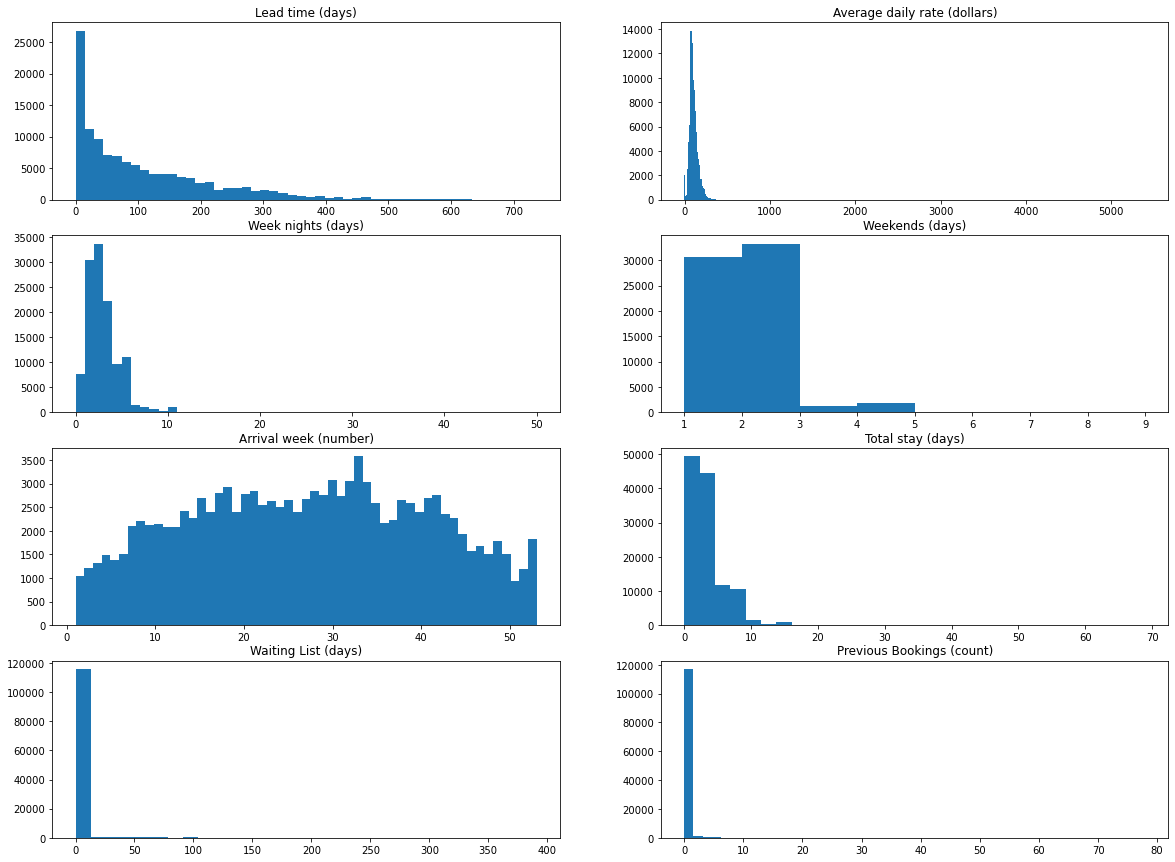

In [5]:
plt.figure(figsize= (20, 15))
plt.subplot(422)
plt.hist(dfh3.ADR, bins= 500)
plt.title('Average daily rate (dollars)')
plt.subplot(421)
plt.hist(dfh3.LeadTime, bins= 50)
plt.title('Lead time (days)')
plt.subplot(423)
plt.hist(dfh3.StaysInWeekNights, bins= 50)
plt.title('Week nights (days)')
plt.subplot(424)
plt.hist(dfh3.StaysInWeekendNights, bins= [1,2,3,4,5,6,7,8,9,])
plt.title('Weekends (days)')
plt.subplot(425)
plt.hist(dfh3.ArrivalDateWeekNumber, bins= 53)
plt.title('Arrival week (number)')
plt.subplot(426)
plt.hist(dfh3.StaysTotalNights, bins= 30)
plt.title('Total stay (days)')
plt.subplot(427)
plt.hist(dfh3.DaysInWaitingList, bins= 30)
plt.title('Waiting List (days)')
plt.subplot(428)
plt.hist(dfh3.PreviousBookings, bins= 50)
plt.title('Previous Bookings (count)')

In [6]:
def outlier_count(column = 'column'):
    a = {}
    for x in dfh3[column]:
        if x in a:
            a[x] += 1
        else:
            a[x] = 1
    return(sorted(a.items(), reverse = True)[:15])
print('LeadTime',outlier_count('LeadTime'))
print('ADR',outlier_count('ADR'))
print('TotalStay', outlier_count('StaysTotalNights'))
print('DaysInWaitingList', outlier_count('DaysInWaitingList'))
print('PreviousBookings', outlier_count('PreviousBookings'))

LeadTime [(737, 1), (709, 1), (629, 17), (626, 30), (622, 17), (615, 17), (608, 17), (605, 30), (601, 17), (594, 17), (587, 17), (580, 17), (573, 17), (566, 17), (559, 17)]
ADR [(5400.0, 1), (510.0, 1), (508.0, 1), (451.5, 1), (450.0, 1), (437.0, 1), (426.25, 1), (402.0, 1), (397.38, 1), (392.0, 2), (388.0, 2), (387.0, 1), (384.0, 1), (383.0, 1), (382.0, 2)]
TotalStay [(69, 1), (60, 1), (57, 1), (56, 2), (49, 1), (48, 1), (46, 1), (45, 1), (43, 1), (42, 4), (38, 1), (35, 5), (34, 1), (33, 3), (30, 13)]
DaysInWaitingList [(391, 45), (379, 15), (330, 15), (259, 10), (236, 35), (224, 10), (223, 61), (215, 21), (207, 15), (193, 1), (187, 45), (185, 2), (183, 1), (178, 30), (176, 50)]
PreviousBookings [(78, 1), (77, 1), (76, 1), (75, 1), (74, 1), (73, 1), (72, 1), (71, 1), (70, 1), (69, 1), (68, 1), (67, 1), (66, 1), (65, 1), (64, 2)]


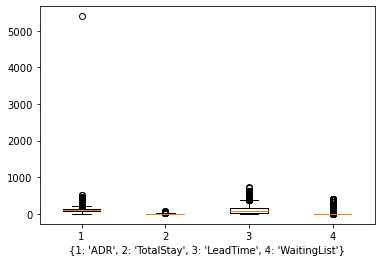

In [7]:
plt.boxplot([dfh3.ADR, dfh3.StaysTotalNights, dfh3.LeadTime, dfh3.DaysInWaitingList])
plt.xlabel({1:'ADR', 2:'TotalStay', 3:'LeadTime', 4:'WaitingList'})
dfh3 = dfh3[dfh3.ADR < 1000]

Text(0.5, 0, "{1: 'ADR', 2: 'TotalStay', 3: 'LeadTime', 4: 'WaitingList'}")

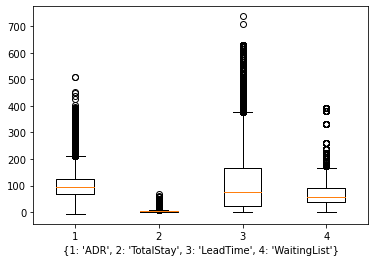

In [8]:
plt.boxplot([dfh3.ADR, dfh3.StaysTotalNights, dfh3[dfh3.LeadTime > 0].LeadTime, dfh3[dfh3.DaysInWaitingList > 0].DaysInWaitingList])
plt.xlabel({1:'ADR', 2:'TotalStay', 3:'LeadTime', 4:'WaitingList'})

In [9]:
dfh3.agg({'LeadTime':['mean','median','skew','std', 'kurt'],
         'ADR':['mean','median','skew','std', 'kurt'],
         'DaysInWaitingList':['mean','median','skew','std','kurt'],
         'StaysTotalNights':['mean','median','skew','std','kurt']})

,LeadTime,ADR,DaysInWaitingList,StaysTotalNights
mean,104.011994,101.786744,2.321169,3.427920
median,69.000000,94.560000,0.000000,3.000000
skew,1.346537,1.017731,11.944303,3.308778
std,106.863358,48.153554,17.594793,2.557440
kurt,1.696412,2.131745,186.791483,28.873823


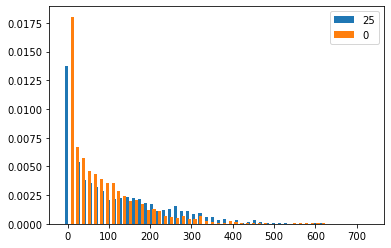

In [10]:

plt.hist(dfh3[dfh3.ArrivalDateWeekNumber > 25].LeadTime, width= 7.5,align= 'left', bins= 50, density= True, label= '25')
plt.hist(dfh3[dfh3.ArrivalDateWeekNumber < 25].LeadTime, width= 7.5, align= 'right', bins= 50, density= True, label= '0')
plt.legend()
plt.show()

(array([1047., 1218., 1319., 1487., 1387., 1508., 2109., 2216., 2117.,
        2149., 2070., 2083., 2415., 2264., 2689., 2405., 2805., 2926.,
        2402., 2785., 2854., 2546., 2621., 2498., 2663., 2391., 2664.,
        2853., 2763., 3087., 2741., 3045., 3580., 3040., 2593., 2167.,
        2229., 2661., 2581., 2397., 2699., 2756., 2352., 2272., 1941.,
        1574., 1685., 1504., 1782., 1505.,  933., 1195., 1816.]),
 array([-12.        , -11.01886792, -10.03773585,  -9.05660377,
         -8.0754717 ,  -7.09433962,  -6.11320755,  -5.13207547,
         -4.1509434 ,  -3.16981132,  -2.18867925,  -1.20754717,
         -0.22641509,   0.75471698,   1.73584906,   2.71698113,
          3.69811321,   4.67924528,   5.66037736,   6.64150943,
          7.62264151,   8.60377358,   9.58490566,  10.56603774,
         11.54716981,  12.52830189,  13.50943396,  14.49056604,
         15.47169811,  16.45283019,  17.43396226,  18.41509434,
         19.39622642,  20.37735849,  21.35849057,  22.33962264,
   

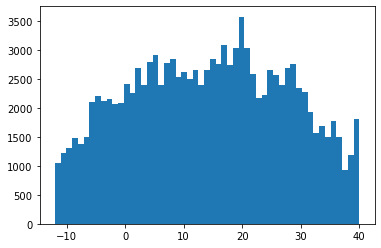

In [11]:
dfh3['WeekRefigured'] = dfh3.ArrivalDateWeekNumber - 13
plt.hist(dfh3.WeekRefigured, bins= 53)

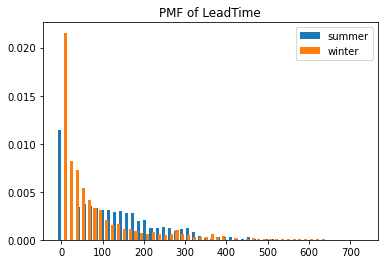

In [12]:


plt.hist(dfh3[(dfh3.WeekRefigured < 26) & (dfh3.WeekRefigured > 0)].LeadTime, width= 7.5,align= 'left', bins= 50, density= True, label= 'summer')
plt.hist(dfh3[(dfh3.WeekRefigured > 26) | (dfh3.WeekRefigured < 0)].LeadTime, width= 7.5, align= 'right', bins= 50, density= True, label= 'winter')
plt.legend()
plt.title('PMF of LeadTime')
plt.show()

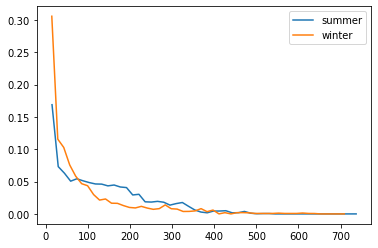

In [13]:
sx, sy = np.histogram(dfh3[(dfh3.WeekRefigured < 26) & (dfh3.WeekRefigured > 0)].LeadTime, bins= 50)
wx, wy = np.histogram(dfh3[(dfh3.WeekRefigured > 26) | (dfh3.WeekRefigured < 0)].LeadTime, bins= 50)
plt.plot(sy[1:], sx/sum(sx), label= 'summer')
plt.plot(wy[1:], wx/sum(wx), label= 'winter')
plt.legend()

Text(0.5, 1.0, 'Lead Time')

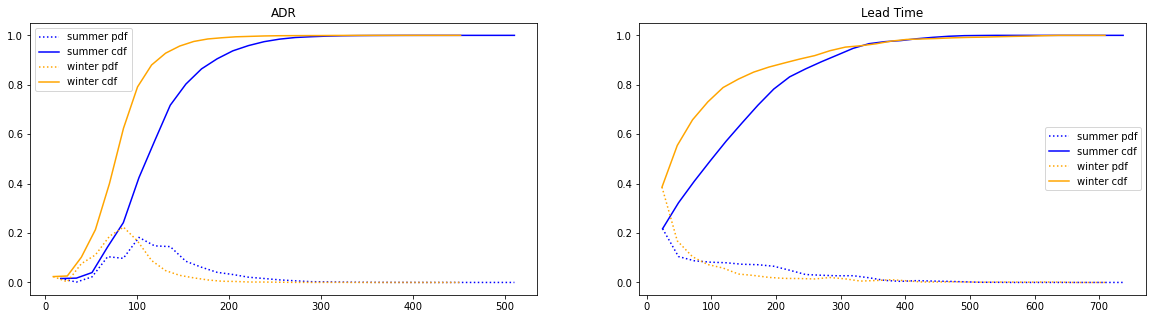

In [14]:

ax, ay = np.histogram(dfh3[(dfh3.WeekRefigured < 26) & (dfh3.WeekRefigured > 0)].ADR, bins= 30)
awx, awy = np.histogram(dfh3[(dfh3.WeekRefigured > 26) | (dfh3.WeekRefigured < 0)].ADR, bins= 30)
apdf = ax/sum(ax)
awpdf = awx/sum(awx)
acdf = np.cumsum(apdf)
awcdf = np.cumsum(awpdf)
ax1, ay1 = np.histogram(dfh3[(dfh3.WeekRefigured < 26) & (dfh3.WeekRefigured > 0)].LeadTime, bins= 30)
awx1, awy1 = np.histogram(dfh3[(dfh3.WeekRefigured > 26) | (dfh3.WeekRefigured < 0)].LeadTime, bins= 30)
apdf1 = ax1/sum(ax1)
awpdf1 = awx1/sum(awx1)
acdf1 = np.cumsum(apdf1)
awcdf1 = np.cumsum(awpdf1)
plt.figure(figsize= (20,5))
plt.subplot(121)
plt.plot(ay[1:], apdf,':', color= 'blue' ,label= 'summer pdf')
plt.plot(ay[1:], acdf,color= 'blue', label= 'summer cdf')
plt.plot(awy[1:], awpdf, ':',color= 'orange', label = 'winter pdf')
plt.plot(awy[1:], awcdf,color= 'orange',label= 'winter cdf')
plt.legend()
plt.title('ADR')
plt.subplot(122)
plt.plot(ay1[1:], apdf1,':', color= 'blue' ,label= 'summer pdf')
plt.plot(ay1[1:], acdf1,color= 'blue', label= 'summer cdf')
plt.plot(awy1[1:], awpdf1, ':',color= 'orange', label = 'winter pdf')
plt.plot(awy1[1:], awcdf1,color= 'orange',label= 'winter cdf')
plt.legend()
plt.title('Lead Time')

KstestResult(statistic=0.8670171807177622, pvalue=0.0)


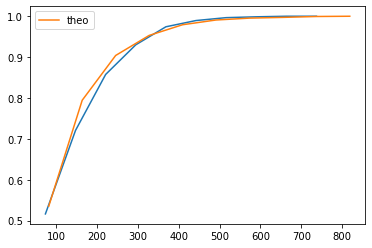

In [15]:
samples = np.random.exponential(np.mean(dfh3["LeadTime"]), size=5000)
x1, y1 = np.histogram(samples)
x,y = np.histogram(dfh3.LeadTime)
pdf = x/sum(x)
cdf = np.cumsum(pdf)
pdf1 = x1/sum(x1)
cdf1 = np.cumsum(pdf1)
ccdf = 1 - cdf
plt.plot(y[1:], cdf)
plt.plot(y1[1:], cdf1, label= 'theo')
plt.legend()
print(stat.kstest(dfh3["LeadTime"], 'expon'))

0.21758933249781223 -0.06560260322568374 0.15716270405368435


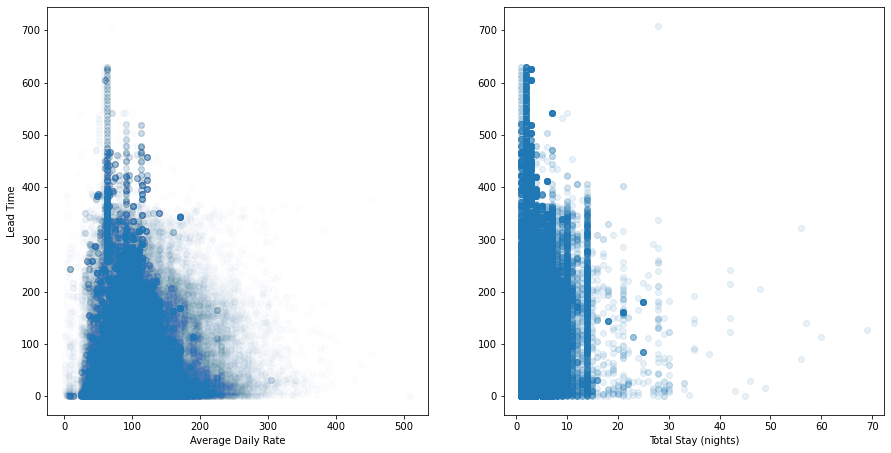

In [16]:
plt.figure(figsize= (15,7.5))
plt.subplot(121)
plt.scatter(dfh3[dfh3.ADR > 0].ADR, dfh3[dfh3.ADR > 0].LeadTime, alpha= .01)
plt.xlabel('Average Daily Rate')
plt.ylabel('Lead Time')
plt.subplot(122)
plt.scatter(dfh3[dfh3.StaysTotalNights > 0].StaysTotalNights, dfh3[dfh3.StaysTotalNights > 0].LeadTime, alpha= .1)
plt.xlabel('Total Stay (nights)')
print(dfh3.WeekCount.corr(dfh3.LeadTime), dfh3.ADR.corr(dfh3.LeadTime), dfh3.StaysTotalNights.corr(dfh3.LeadTime))

In [17]:
print('mean test LeadTime')

print(stat.ttest_ind(dfh3[(dfh3.WeekRefigured < 26) & (dfh3.WeekRefigured > 0)].LeadTime, 
               dfh3[(dfh3.WeekRefigured > 26) | (dfh3.WeekRefigured < 0)].LeadTime))

print('mean test ADR')
print(stat.ttest_ind(dfh3[(dfh3.WeekRefigured < 26) & (dfh3.WeekRefigured > 0)].ADR, 
               dfh3[(dfh3.WeekRefigured > 26) | (dfh3.WeekRefigured < 0)].ADR ))
#mean test cumt
print(stat.ttest_ind(dfh3[(dfh3.WeekRefigured < 26) & (dfh3.WeekRefigured > 0)].WeekCount, 
               dfh3[(dfh3.WeekRefigured > 26) | (dfh3.WeekRefigured < 0)].WeekCount))

print('cor WeekCont ADR')
(dfh3.WeekCount.corr(dfh3.ADR), dfh3.WeekCount.corr(dfh3.ADR, 'spearman') )
print(stat.pearsonr(dfh3.WeekCount, dfh3.ADR),stat.spearmanr(dfh3.WeekCount, dfh3.ADR))
print('cor WeekCount LeadTime')
(dfh3.WeekCount.corr(dfh3.LeadTime), dfh3.WeekCount.corr(dfh3.LeadTime, 'spearman'))
print(stat.pearsonr(dfh3.WeekCount, dfh3.LeadTime),stat.spearmanr(dfh3.WeekCount, dfh3.LeadTime))
print('cor ADR LeadTime')
(dfh3.ADR.corr(dfh3.LeadTime))
print(stat.pearsonr(dfh3.LeadTime,dfh3.ADR))
print(stat.pearsonr(dfh3.LeadTime, dfh3.StaysTotalNights))

mean test LeadTime
Ttest_indResult(statistic=67.66613926932408, pvalue=0.0)
mean test ADR
Ttest_indResult(statistic=142.39896526421992, pvalue=0.0)
Ttest_indResult(statistic=335.9913091482335, pvalue=0.0)
cor WeekCont ADR
(0.3814843730420176, 0.0) SpearmanrResult(correlation=0.39587894978498966, pvalue=0.0)
cor WeekCount LeadTime
(0.21758933249781226, 0.0) SpearmanrResult(correlation=0.2496423764173558, pvalue=0.0)
cor ADR LeadTime
(-0.0656026032256837, 5.412110078115806e-114)
(0.1571627040536846, 0.0)


In [18]:
#regression ADR ~ cumt, LeadTime
alm = sm.OLS(dfh3.ADR, dfh3[['WeekCount', 'LeadTime']]).fit()
alm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ADR   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                          3.294e+05
Date:                Fri, 04 Jun 2021   Prob (F-statistic):                        0.00
Time:                        11:39:58   Log-Likelihood:                     -6.2148e+05
No. Observations:              119389   AIC:                                  1.243e+06
Df Residuals:                  119387   BIC:                                  1.243e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WeekCount      0.0449    7.4e-05    607.360      0.000       0.045       0.045
LeadTime      -0.0703      0.001    -57.464      0.000      -0.073      -0.068
==============================================================================
Omnibus:                    14134.677   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34035.250
Skew:                           0.698   Prob(JB):                         0.00
Kurtosis:                       5.212   Cond. No.                         23.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

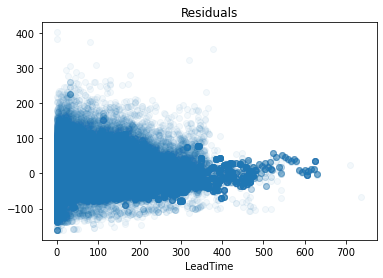

(44.103910778408775, 48.153352654646774, -8.409466838755774)

In [19]:
res = dfh3.ADR - alm.predict()
mres = dfh3.ADR - np.mean(dfh3.ADR)
plt.scatter(dfh3.LeadTime, res, alpha= .05)
plt.title('Residuals')
plt.xlabel('LeadTime')
plt.show()

np.sqrt(((alm.predict() - dfh3.ADR) ** 2).mean()), np.sqrt(((np.mean(dfh3.ADR) - dfh3.ADR) ** 2).mean()), ((44.10391 - 48.15335)/48.15335)* 100

In [20]:
#regression LeadTime ~ cumt, ADR
llm = sm.OLS(dfh3.LeadTime, dfh3[['WeekCount', 'ADR']]).fit()
llm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               LeadTime   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.524
Method:                 Least Squares   F-statistic:                          6.570e+04
Date:                Fri, 04 Jun 2021   Prob (F-statistic):                        0.00
Time:                        11:39:59   Log-Likelihood:                     -7.2261e+05
No. Observations:              119389   AIC:                                  1.445e+06
Df Residuals:                  119387   BIC:                                  1.445e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WeekCount      0.0593      0.000    194.854      0.000       0.059       0.060
ADR           -0.3827      0.007    -57.464      0.000      -0.396      -0.370
==============================================================================
Omnibus:                    26291.238   Durbin-Watson:                   0.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55935.360
Skew:                           1.290   Prob(JB):                         0.00
Kurtosis:                       5.143   Cond. No.                         55.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

102.88881009055491 106.86291039977888 -3.862519457389263


(102.88934699932202, 106.8629103997785, -3.718690022449326)

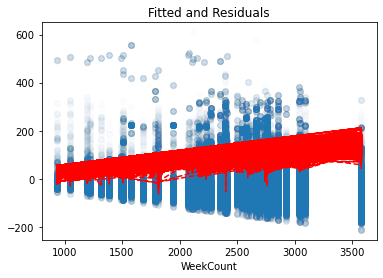

In [21]:
res1 = dfh3.LeadTime - llm.predict()
mres1 = dfh3.LeadTime - np.mean(dfh3.LeadTime)
plt.scatter(dfh3.WeekCount, res1, alpha= .01)
plt.plot(dfh3.WeekCount, llm.predict(), 'r--')
plt.title('Fitted and Residuals')
plt.xlabel('WeekCount')
print(np.std(res1), np.std(mres1), ((np.std(res1) - np.std(mres1)) / np.std(res1)) *100)
np.sqrt(((llm.predict() - dfh3.LeadTime) ** 2).mean()), np.sqrt(((np.mean(dfh3.LeadTime) - dfh3.LeadTime) ** 2).mean()), ((102.889 - 106.8629)/106.8629)* 100